In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()

spark-2.4.0-bin-hadoop2.7/
spark-2.4.0-bin-hadoop2.7/python/
spark-2.4.0-bin-hadoop2.7/python/setup.cfg
spark-2.4.0-bin-hadoop2.7/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.0-bin-hadoop2.7/python/pyspark

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/LDS9_K273_BuiThiHuong_Cuoi_ky/'

/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/LDS9_K273_BuiThiHuong_Cuoi_ky


In [4]:
import pyspark

In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

from pyspark.sql.functions import collect_list, col, count, collect_set
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType, StringType

from pyspark.ml.fpm import FPGrowth

In [6]:
sc = SparkContext()

In [7]:
spark = SparkSession.builder.appName('C6_FPM_AssociationRules_BAKERY').getOrCreate()

## Read data

In [8]:
start_time = time.time()

In [9]:
# Loads "75000-out1.csv"
data_out1 = spark.read.csv('Data/75000/75000-out1.csv', inferSchema=True)

In [10]:
data_out1.show(5)

+---+----+----+
|_c0| _c1| _c2|
+---+----+----+
|  1|11.0|21.0|
|  2| 7.0|11.0|
|  3| 3.0|33.0|
|  4| 5.0|12.0|
|  5| 6.0|18.0|
+---+----+----+
only showing top 5 rows



In [11]:
data_out1.count()

75000

In [12]:
data_out1.select('_c0').distinct().count()

75000

In [13]:
data_out1.select('_c1').distinct().count()

50

In [14]:
data_out1.select('_c2').distinct().count()

50

In [15]:
# Loads "75000-out2.csv"
data_out2 = spark.read.csv('Data/75000/75000-out2.csv', inferSchema=True)

In [16]:
data_out2.show(5)

+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|_c1|_c2|_c3|_c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|
+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1|  0|  0|  0|  0|  0|  0|  0|  0|  0|   0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2|  0|  0

In [17]:
data_out2.count()

75000

In [18]:
data_out2.select('_c0').distinct().count()

75000

In [19]:
# Loads "7500i.csv"
data_i = spark.read.csv('Data/75000/75000i.csv', inferSchema=True)

In [20]:
data_i.show(5)

+---+---+---+
|_c0|_c1|_c2|
+---+---+---+
|  1|  1| 21|
|  1|  5| 11|
|  2|  1|  7|
|  2|  3| 11|
|  2|  4| 37|
+---+---+---+
only showing top 5 rows



In [21]:
data_i.count()

266209

In [22]:
data_i.select('_c0').distinct().count()

75000

In [23]:
data_i.select('_c1').distinct().count()

5

In [24]:
data_i.select('_c2').distinct().count()

50

In [25]:
# Loads "goods.csv"
product_data = spark.read.csv('Data/75000/goods.csv', inferSchema=True, header=True)

In [26]:
product_data.show(5)

+---+------------+------+-----+------+
| Id|      Flavor|  Food|Price|  Type|
+---+------------+------+-----+------+
|  0| 'Chocolate'|'Cake'| 8.95|'Food'|
|  1|     'Lemon'|'Cake'| 8.95|'Food'|
|  2|    'Casino'|'Cake'|15.95|'Food'|
|  3|     'Opera'|'Cake'|15.95|'Food'|
|  4|'Strawberry'|'Cake'|11.95|'Food'|
+---+------------+------+-----+------+
only showing top 5 rows



In [27]:
product_data = product_data.select("*", concat(col("Food"),lit("-"),col("Flavor")).alias("product_name"))

In [28]:
product_data.count()

50

In [29]:
product_data.select('Id').distinct().count()

50

* According to count value and distinct count value, "7500i.csv" has 266,209 rows, with column "_c0" has 75,000 distinct values and column "_c02" has 50 distinct values => "_c0" will contains the order ids and "_c2" will contains the product ids

In [30]:
# change column names
data = data_i.select('_c0','_c2').withColumnRenamed('_c0','order_id').withColumnRenamed('_c2','product_id')

In [31]:
data.show(5)

+--------+----------+
|order_id|product_id|
+--------+----------+
|       1|        21|
|       1|        11|
|       2|         7|
|       2|        11|
|       2|        37|
+--------+----------+
only showing top 5 rows



In [32]:
data.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)



In [33]:
# check NaN
data.select([sum(when(isnan(col(col_name)),1)
          .otherwise(0)).alias(col_name)
          for col_name in data.columns]).toPandas().T

,0
order_id,0
product_id,0


In [34]:
# check null
data.select([sum(when(col(col_name).isNull(),1)
          .otherwise(0)).alias(col_name)
          for col_name in data.columns]).toPandas().T

,0
order_id,0
product_id,0


* There is not missing values

## Data Pre-Processing

In [35]:
# create a view of order_products_train
data.createOrReplaceTempView('order_products_train')

In [36]:
# count number of products
products = spark.sql('select distinct product_id from order_products_train')
products.count()

50

In [37]:
# collect the baskets and create a view of baskets
rawData = spark.sql('select * from order_products_train')
baskets = rawData.groupBy('order_id').agg(collect_set('product_id').alias('items'))
baskets.createOrReplaceTempView('baskets')

In [38]:
baskets.show(5, truncate=False)

+--------+----------------------+
|order_id|items                 |
+--------+----------------------+
|148     |[33, 27, 9, 46, 28, 4]|
|463     |[17, 14]              |
|471     |[9, 37, 34, 20]       |
|496     |[15, 6, 47, 26]       |
|833     |[12, 5, 21]           |
+--------+----------------------+
only showing top 5 rows



In [39]:
baskets.count()

75000

* We have 75,000 baskets

## Build model

In [40]:
# ratio of number of product/number of baskets (transactions)
data.select('product_id').distinct().count()/data.select('order_id').distinct().count()

0.0006666666666666666

In [41]:
# calculate support ratio of each product
grouped_product = data.select('product_id').groupBy('product_id').count()
grouped_product = grouped_product.withColumn('ratio', (grouped_product['count'])/(data.select('order_id').distinct().count())).orderBy('ratio')
grouped_product_pdf = grouped_product.toPandas()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


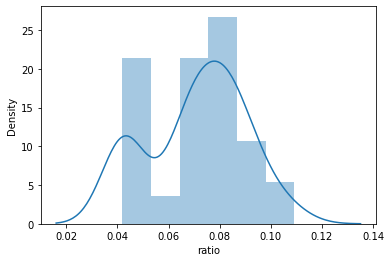

In [42]:
# distplot of the ratio
sns.distplot(grouped_product_pdf['ratio'])

In [43]:
# min and max of support ratios
grouped_product_pdf['ratio'].agg(['min','max'])

min    0.041933
max    0.109240
Name: ratio, dtype: float64

In [44]:
# min support/max suppport
(grouped_product_pdf['ratio'].min())/(grouped_product_pdf['ratio'].max())

0.3838642743805688

In [45]:
# build model
# choose minSuport = 0.02, minConfidence = 0.1
fpGrowth = FPGrowth(itemsCol='items', minSupport=0.02, minConfidence=0.1)
model = fpGrowth.fit(baskets)

In [46]:
# display frequent itemsets
model.freqItemsets.show(truncate=False)

+--------+----+
|items   |freq|
+--------+----+
|[7]     |8193|
|[45]    |7700|
|[45, 7] |2367|
|[28]    |7556|
|[18]    |6987|
|[4]     |6948|
|[35]    |6943|
|[35, 18]|3982|
|[42]    |6871|
|[22]    |6783|
|[27]    |6733|
|[27, 28]|3819|
|[14]    |6362|
|[32]    |6299|
|[32, 45]|2653|
|[1]     |6271|
|[0]     |6265|
|[46]    |6236|
|[46, 0] |3303|
|[16]    |6221|
+--------+----+
only showing top 20 rows



In [47]:
# transform examines the input items against all the association rules and summarize the
# consuquents as prediction
mostPopularItemInBasket = model.transform(baskets)

In [48]:
mostPopularItemInBasket.show(3, truncate=False, vertical=True)

-RECORD 0----------------------------
 order_id   | 148                    
 items      | [33, 27, 9, 46, 28, 4] 
 prediction | [42, 0, 2]             
-RECORD 1----------------------------
 order_id   | 463                    
 items      | [17, 14]               
 prediction | [44, 47, 29]           
-RECORD 2----------------------------
 order_id   | 471                    
 items      | [9, 37, 34, 20]        
 prediction | [45, 7, 11, 4]         
only showing top 3 rows



In [49]:
mostPopularItemInBasket.createOrReplaceTempView('new_view')

In [50]:
# create Dataframe contains order_id, items, prediction
DF_cast_product_id = mostPopularItemInBasket.select('order_id',
                                           mostPopularItemInBasket.items.cast(StringType()),
                                           mostPopularItemInBasket.prediction.cast(StringType()))

In [51]:
DF_cast_product_id.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- items: string (nullable = true)
 |-- prediction: string (nullable = true)



In [52]:
DF_cast_product_id.show(3, truncate=False, vertical=True)

-RECORD 0----------------------------
 order_id   | 148                    
 items      | [33, 27, 9, 46, 28, 4] 
 prediction | [42, 0, 2]             
-RECORD 1----------------------------
 order_id   | 463                    
 items      | [17, 14]               
 prediction | [44, 47, 29]           
-RECORD 2----------------------------
 order_id   | 471                    
 items      | [9, 37, 34, 20]        
 prediction | [45, 7, 11, 4]         
only showing top 3 rows



# Use product_name instead of product_id

## Data Pre-Processing

In [53]:
# create a view of products
product_data.createOrReplaceTempView('products')

In [54]:
# create baskets with contains product_name and create a view
query = 'select p.product_name, o.order_id from products p inner join order_products_train o where o.product_id = p.id'
rawData_1 = spark.sql(query)
baskets_1 = rawData_1.groupBy('order_id').agg(collect_set('product_name').alias('items'))
baskets_1.createOrReplaceTempView('baskets1')

In [55]:
baskets_1.head(3)

[Row(order_id=148, items=["'Cake'-'Napoleon'", "'Cookie'-'Tuile'", "'Coffee'-'Chocolate'", "'Cookie'-'Marzipan'", "'Cake'-'Strawberry'", "'Croissant'-'Cheese'"]),
 Row(order_id=463, items=["'Tart'-'Berry'", "'Tart'-'Chocolate'"]),
 Row(order_id=471, items=["'Cake'-'Napoleon'", "'Tart'-'Pecan'", "'Twist'-'Almond'", "'Croissant'-'Chocolate'"])]

## Build model

In [56]:
# build model
# choose minSuport = 0.02, minConfidence = 0.1
fpGrowth_1 = FPGrowth(itemsCol='items', minSupport=0.02, minConfidence=0.1)
model_1 = fpGrowth.fit(baskets_1)

In [57]:
# display frequent itemsets
model_1.freqItemsets.show(truncate=False)

+------------------------------------------+----+
|items                                     |freq|
+------------------------------------------+----+
|['Eclair'-'Coffee']                       |8193|
|['Coffee'-'Hot']                          |7700|
|['Coffee'-'Hot', 'Eclair'-'Coffee']       |2367|
|['Cookie'-'Tuile']                        |7556|
|['Tart'-'Cherry']                         |6987|
|['Cake'-'Strawberry']                     |6948|
|['Danish'-'Apricot']                      |6943|
|['Danish'-'Apricot', 'Tart'-'Cherry']     |3982|
|['Juice'-'Orange']                        |6871|
|['Cookie'-'Gongolais']                    |6783|
|['Cookie'-'Marzipan']                     |6733|
|['Cookie'-'Marzipan', 'Cookie'-'Tuile']   |3819|
|['Tart'-'Berry']                          |6362|
|['Croissant'-'Apricot']                   |6299|
|['Croissant'-'Apricot', 'Coffee'-'Hot']   |2653|
|['Cake'-'Lemon']                          |6271|
|['Cake'-'Chocolate']                      |6265|


In [58]:
# display frequent itemsets
model_1.freqItemsets.orderBy(col('freq').desc()).show(5)

+--------------------+----+
|               items|freq|
+--------------------+----+
| ['Eclair'-'Coffee']|8193|
|    ['Coffee'-'Hot']|7700|
|  ['Cookie'-'Tuile']|7556|
|   ['Tart'-'Cherry']|6987|
|['Cake'-'Strawber...|6948|
+--------------------+----+
only showing top 5 rows



In [59]:
# transform examines the input items against all the association rules and summarize the
# consuquents as prediction
mostPopularItemInBasket_1 = model_1.transform(baskets_1)

In [60]:
mostPopularItemInBasket_1.show(3, truncate=False, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------
 order_id   | 148                                                                                                                         
 items      | ['Cake'-'Napoleon', 'Cookie'-'Tuile', 'Coffee'-'Chocolate', 'Cookie'-'Marzipan', 'Cake'-'Strawberry', 'Croissant'-'Cheese'] 
 prediction | ['Cake'-'Chocolate', 'Cake'-'Casino', 'Juice'-'Orange']                                                                     
-RECORD 1---------------------------------------------------------------------------------------------------------------------------------
 order_id   | 463                                                                                                                         
 items      | ['Tart'-'Berry', 'Tart'-'Chocolate']                                                                                        
 prediction | ['Frappuccino

In [61]:
type(mostPopularItemInBasket_1)

pyspark.sql.dataframe.DataFrame

In [62]:
mostPopularItemInBasket_1.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- items: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- prediction: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [63]:
mostPopularItemInBasket_1.createOrReplaceTempView('new_view_1')

In [64]:
# convert list of array to string
from pyspark.sql.types import StringType

In [65]:
DF_cast_product_name = mostPopularItemInBasket_1.select('order_id',
                                           mostPopularItemInBasket_1.items.cast(StringType()),
                                           mostPopularItemInBasket_1.prediction.cast(StringType()))

In [66]:
DF_cast_product_name.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- items: string (nullable = true)
 |-- prediction: string (nullable = true)



In [67]:
DF_cast_product_name.show(3, truncate=False, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------
 order_id   | 148                                                                                                                         
 items      | ['Cake'-'Napoleon', 'Cookie'-'Tuile', 'Coffee'-'Chocolate', 'Cookie'-'Marzipan', 'Cake'-'Strawberry', 'Croissant'-'Cheese'] 
 prediction | ['Cake'-'Chocolate', 'Cake'-'Casino', 'Juice'-'Orange']                                                                     
-RECORD 1---------------------------------------------------------------------------------------------------------------------------------
 order_id   | 463                                                                                                                         
 items      | ['Tart'-'Berry', 'Tart'-'Chocolate']                                                                                        
 prediction | ['Frappuccino

## Save the result

In [68]:
DF_cast_product_id.count()

75000

In [69]:
DF_cast_product_name.count()

75000

In [70]:
DF_cast_product_id.write.parquet('C6_AssociationRules_BAKERY_product_id.parquet', mode='overwrite')
DF_cast_product_name.write.parquet('C6_AssociationRules_BAKERY_product_name.parquet', mode='overwrite')
# => In the real world, we will save the result with product_id, not product_name

In [71]:
# read parquet
df_new_product_id = spark.read.parquet('C6_AssociationRules_BAKERY_product_id.parquet')
df_new_product_name = spark.read.parquet('C6_AssociationRules_BAKERY_product_name.parquet')

In [72]:
df_new_product_id.count()

75000

In [73]:
df_new_product_name.count()

75000

In [74]:
df_new_product_id.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- items: string (nullable = true)
 |-- prediction: string (nullable = true)



In [75]:
df_new_product_name.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- items: string (nullable = true)
 |-- prediction: string (nullable = true)



In [76]:
df_new_product_id.show(5, truncate=False, vertical=True)

-RECORD 0----------------------
 order_id   | 35               
 items      | [12, 48, 31, 36] 
 prediction | []               
-RECORD 1----------------------
 order_id   | 503              
 items      | [5, 22]          
 prediction | []               
-RECORD 2----------------------
 order_id   | 583              
 items      | [33, 42]         
 prediction | []               
-RECORD 3----------------------
 order_id   | 594              
 items      | [1, 19, 38]      
 prediction | []               
-RECORD 4----------------------
 order_id   | 610              
 items      | [30, 11]         
 prediction | [37, 45, 7]      
only showing top 5 rows



In [77]:
df_new_product_name.show(5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------
 order_id   | 168                                                                      
 items      | ['Tart'-'Pecan', 'Danish'-'Apricot', 'Cake'-'Opera']                     
 prediction | ['Tart'-'Cherry']                                                        
-RECORD 1------------------------------------------------------------------------------
 order_id   | 205                                                                      
 items      | ['Cake'-'Napoleon', 'Cake'-'Strawberry']                                 
 prediction | []                                                                       
-RECORD 2------------------------------------------------------------------------------
 order_id   | 572                                                                      
 items      | ['Danish'-'Apple', 'Tart'-'Apple', 'Croissant'-'Apple', 'Soda'-'Cherry'] 
 prediction | []                

In [78]:
end_time = time.time()

In [79]:
duration = (end_time - start_time)/60
duration = int(duration)

In [80]:
print('Total time for model training is about', duration, 'minutes')

Total time for model training is about 2 minutes
